In [4]:
from pyvis.network import Network

### Basic Example

In [13]:
g = Network(notebook=True,directed=True)
g.add_nodes(range(5))
# g.add_edges([
#     (0, 2),
#     (0, 3),
#     (0, 4),
#     (1, 3),
#     (1, 2)
# ])
g.add_edge(0,2,value = 3)
g.show("example.html")

### Basic NetworkX example

In [7]:
import networkx as nx

In [5]:
nxg = nx.random_tree(20)
g.from_nx(nxg)
g.show("j.html")

### Disabling Physics interaction

In [5]:
g.toggle_physics(False)
g.show("example.html")

### Explicit coordinates to layout nodes

In [6]:
g = Network(notebook=True)
g.add_nodes([1,2,3],
            value=[10, 100, 400],
            title=["I am node 1", "node 2 here", "and im node 3"],
            x=[21.4, 21.4, 21.4], y=[100.2, 223.54, 32.1],
            label=["NODE 1", "NODE 2", "NODE 3"],
            color=["#00ff1e", "#162347", "#dd4b39"])
g.show("example.html")

### Full Game of Thrones example

In [7]:
import pandas as pd

got_net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]]) # this value attrribute for the node affects node size

got_net.show("example.html")

ModuleNotFoundError: No module named 'pandas'

### Experimenting with options UI
Scroll down underneath the graph to play around with the physics settings to acheive optimal layout and behavior. You can use the generate options button to display the JSON representation of the configuration.

In [ ]:
got_net.show_buttons(filter_="physics")
got_net.show("example.html")

In [ ]:
import networkx as nx

In [ ]:
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)

nt = Network(notebook=True, height="750px", width="100%")

nt.from_nx(nx_graph)
nt.show("nx.html")

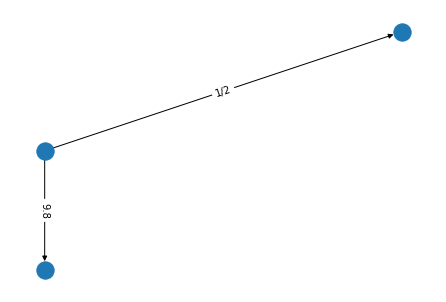

In [15]:
#!/usr/bin/python
import networkx as nx
import matplotlib.pyplot as plt

g = Network(notebook=True,directed=True)
G=nx.DiGraph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight="1/2")
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

# g.from_nx(G)
# g.show("j.html")
